In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [76]:
jp_sales_df = pd.read_csv('data/Japan/Japan_console_weekly_sales.csv')
jp_gdp_df = pd.read_csv('data/Japan/Japan_GDP.csv', delimiter=';')
jp_ir_df = pd.read_csv('data/Japan/Japan_IR.csv', delimiter=';')
jp_unemployment_df = pd.read_csv('data/Japan/Japan_Unemployment.csv', delimiter=';')
yen_df = pd.read_csv('data/Japan/Dollar_Yen.csv', delimiter=';')

jp_sales_df['week'] = pd.to_datetime(jp_sales_df['week'])
jp_sales_df['year'] = jp_sales_df['week'].dt.year

annual_sales = jp_sales_df.groupby('year')['sales'].sum().reset_index()
annual_sales['millions'] = annual_sales['sales'] / 1_000_000

jp_gdp_df['GDP'] = jp_gdp_df['GDP'] / 1_000_000_000_000

yen_df['Date'] = pd.to_datetime(yen_df['Date'])
yen_df['year'] = yen_df['Date'].dt.year
annual_yen = yen_df.groupby('year')['Value'].mean().reset_index()
annual_yen = annual_yen.rename(columns={'Value':'Dollar_Yen'})

jp_merged_df = pd.merge(annual_sales, jp_gdp_df, on='year', how='inner')
jp_merged_df = pd.merge(jp_merged_df, jp_ir_df, on='year', how='inner')
jp_merged_df = pd.merge(jp_merged_df, jp_unemployment_df, on='year', how='inner')
jp_merged_df = pd.merge(jp_merged_df, annual_yen, on='year', how='inner')

jp_merged_df

,year,sales,millions,GDP,inflation_rate,unemployment,Dollar_Yen
0,2004,1557436,1.557436,4.893116,-0.01,4.73,108.150830
1,2005,6838566,6.838566,4.831467,-0.28,4.45,110.106932
2,2006,11891162,11.891162,4.601663,0.25,4.19,116.312072
3,2007,15382788,15.382788,4.579751,0.06,3.89,117.762323
4,2008,11830491,11.830491,5.106679,1.38,4.00,103.390635
5,2009,10405854,10.405854,5.289493,-1.35,5.07,93.682659
6,2010,9489078,9.489078,5.759072,-0.73,5.10,87.781680
7,2011,10305503,10.305503,6.233147,-0.27,4.55,79.696653
8,2012,9528430,9.528430,6.272363,-0.04,4.36,79.818008
9,2013,8360746,8.360746,5.212328,0.34,4.04,97.597131


In [77]:
eu_sales_df = pd.read_csv('data/EU/EU_console_weekly_sales.csv')
eu_gdp_df = pd.read_csv('data/EU/EU_GDP.csv', delimiter=';')
eu_ir_df = pd.read_csv('data/EU/EU_IR.csv', delimiter=';')
eu_unemployment_df = pd.read_csv('data/EU/EU_Unemployment.csv', delimiter=';')
euro_df = pd.read_csv('data/EU/Dollar_Euro.csv', delimiter=';')

eu_sales_df['week'] = pd.to_datetime(eu_sales_df['week'])
eu_sales_df['year'] = eu_sales_df['week'].dt.year

annual_sales = eu_sales_df.groupby('year')['sales'].sum().reset_index()
annual_sales['millions'] = annual_sales['sales'] / 1_000_000

eu_gdp_df['GDP'] = eu_gdp_df['GDP'] / 1_000_000_000_000

euro_df['Date'] = pd.to_datetime(euro_df['Date'])
euro_df['year'] = euro_df['Date'].dt.year
annual_euro = euro_df.groupby('year')['Value'].mean().reset_index()
annual_euro = annual_euro.rename(columns={'Value':'Dollar_Euro'})

eu_merged_df = pd.merge(annual_sales, eu_gdp_df, on='year', how='inner')
eu_merged_df = pd.merge(eu_merged_df, eu_ir_df, on='year', how='inner')
eu_merged_df = pd.merge(eu_merged_df, eu_unemployment_df, on='year', how='inner')
eu_merged_df = pd.merge(eu_merged_df, annual_euro, on='year', how='inner')

eu_merged_df


,year,sales,millions,GDP,inflation_rate,unemployment,Dollar_Euro
0,2004,0,0.000000,11.449209,2.29,9.86,1.243783
1,2005,6580116,6.580116,11.954464,2.49,9.63,1.244133
2,2006,11903194,11.903194,12.768477,2.67,8.69,1.256771
3,2007,25414867,25.414867,14.789547,2.51,7.50,1.371226
4,2008,30815886,30.815886,16.365149,4.16,7.24,1.471170
5,2009,27287109,27.287109,14.846338,0.84,9.21,1.394806
6,2010,23495078,23.495078,14.643444,1.53,9.87,1.326150
7,2011,22446337,22.446337,15.876630,3.29,9.93,1.392522
8,2012,15222482,15.222482,14.733980,2.66,10.88,1.285835
9,2013,12994541,12.994541,15.400027,1.22,11.35,1.328549


In [78]:
na_sales_df = pd.read_csv('data/NA/NA_console_weekly_sales.csv')
na_gdp_df = pd.read_csv('data/NA/NA_GDP.csv', delimiter=';')
na_ir_df = pd.read_csv('data/NA/NA_IR.csv', delimiter=';')
na_unemployment_df = pd.read_csv('data/NA/NA_Unemployment.csv', delimiter=';')
dollar_df = pd.read_csv('data/NA/Dollar_Index.csv', delimiter=';')

na_sales_df['week'] = pd.to_datetime(na_sales_df['week'])
na_sales_df['year'] = na_sales_df['week'].dt.year

annual_sales = na_sales_df.groupby('year')['sales'].sum().reset_index()
annual_sales['millions'] = annual_sales['sales'] / 1_000_000

na_gdp_df['GDP'] = na_gdp_df['GDP'] / 1_000_000_000_000

dollar_df['Date'] = pd.to_datetime(dollar_df['Date'])
dollar_df['year'] = dollar_df['Date'].dt.year
annual_dollar = dollar_df.groupby('year')['Value'].mean().reset_index()
annual_dollar = annual_dollar.rename(columns={'Value':'Dollar_Index'})

na_merged_df = pd.merge(annual_sales, na_gdp_df, on='year', how='inner')
na_merged_df = pd.merge(na_merged_df, na_ir_df, on='year', how='inner')
na_merged_df = pd.merge(na_merged_df, na_unemployment_df, on='year', how='inner')
na_merged_df = pd.merge(na_merged_df, annual_dollar, on='year', how='inner')

na_merged_df


,year,sales,millions,GDP,inflation_rate,unemployment,Dollar_Index
0,2006,13603550,13.603550,15.140992,2.61,4.82,98.600466
1,2007,25597192,25.597192,15.949815,2.50,4.78,93.809965
2,2008,31569536,31.569536,16.329832,3.10,5.84,90.880132
3,2009,30348433,30.348433,15.859348,-0.03,9.17,96.750927
4,2010,29258172,29.258172,16.672949,1.71,9.48,93.054137
5,2011,27305850,27.305850,17.399371,3.03,8.81,88.776720
6,2012,19822479,19.822479,18.088715,1.79,8.00,91.636123
7,2013,15959959,15.959959,18.733746,1.20,7.35,92.761137
8,2014,15372193,15.372193,19.420302,1.76,6.26,95.587565
9,2015,15079338,15.079338,19.858182,0.62,5.46,108.169617


In [79]:
global_sales_df = pd.read_csv('data/Global/Global_console_weekly_sales.csv')
global_gdp_df = pd.read_csv('data/Global/Global_GDP.csv', delimiter=';')
global_ir_df = pd.read_csv('data/Global/Global_IR.csv', delimiter=';')
global_unemployment_df = pd.read_csv('data/Global/Global_Unemployment.csv', delimiter=';')

global_sales_df['week'] = pd.to_datetime(global_sales_df['week'])
global_sales_df['year'] = global_sales_df['week'].dt.year

annual_sales = global_sales_df.groupby('year')['sales'].sum().reset_index()
annual_sales['millions'] = annual_sales['sales'] / 1_000_000

global_gdp_df['GDP'] = global_gdp_df['GDP'] / 1_000_000_000_000

global_merged_df = pd.merge(annual_sales, global_gdp_df, on='year', how='inner')
global_merged_df = pd.merge(global_merged_df, global_ir_df, on='year', how='inner')
global_merged_df = pd.merge(global_merged_df, global_unemployment_df, on='year', how='inner')

global_merged_df

,year,sales,millions,GDP,inflation_rate,unemployment
0,2004,2941291,2.941291,44.151099,3.52,6.34
1,2005,22140029,22.140029,47.811685,4.11,6.23
2,2006,41286741,41.286741,51.815358,4.27,5.98
3,2007,74450529,74.450529,58.389218,4.81,5.78
4,2008,86545314,86.545314,64.152276,8.95,5.83
5,2009,81505031,81.505031,60.814499,2.86,6.42
6,2010,74998262,74.998262,66.609709,3.33,6.29
7,2011,72679891,72.679891,74.080838,4.82,6.16
8,2012,54250465,54.250465,75.705854,3.73,6.16
9,2013,46323506,46.323506,77.873446,2.65,6.11


In [80]:
def correlations(df, macro_vars):
    for var, label in macro_vars.items():
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        fig.suptitle(f'Vendas de Consoles vs. {label}', fontsize=18)
        
        correlation = df['millions'].corr(df[var])

        sns.regplot(data=df, x=var, y='millions', ax=ax1, 
                    scatter_kws={'alpha': 0.6}, line_kws={'color': 'darkred'})
        ax1.set_title(f'Correlação com Linha de Regressão (r = {correlation:.2f})', fontsize=14)
        ax1.set_xlabel(label)
        ax1.set_ylabel('Vendas (em milhões de unidades)')
        
        for i, row in df.iterrows():
            ax1.text(row[var], row['millions'] + 0.2, int(row['year']), 
                    ha='center', size='small', color='darkgrey')
            
        color_sales = 'tab:blue'
        ax2.set_title('Tendências ao Longo do Tempo', fontsize=14)
        ax2.set_xlabel('Ano')
        ax2.set_ylabel('Vendas (em milhões de unidades)', color=color_sales)
        ax2.plot(df['year'], df['millions'], color=color_sales, marker='o', label='Vendas')
        ax2.tick_params(axis='y', labelcolor=color_sales)

        ax_twin = ax2.twinx()
        
        color_macro = 'tab:red'
        ax_twin.set_ylabel(label, color=color_macro)
        ax_twin.plot(df['year'], df[var], color=color_macro, marker='o', linestyle='--', label=label)
        ax_twin.tick_params(axis='y', labelcolor=color_macro)

        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        
        plt.show()

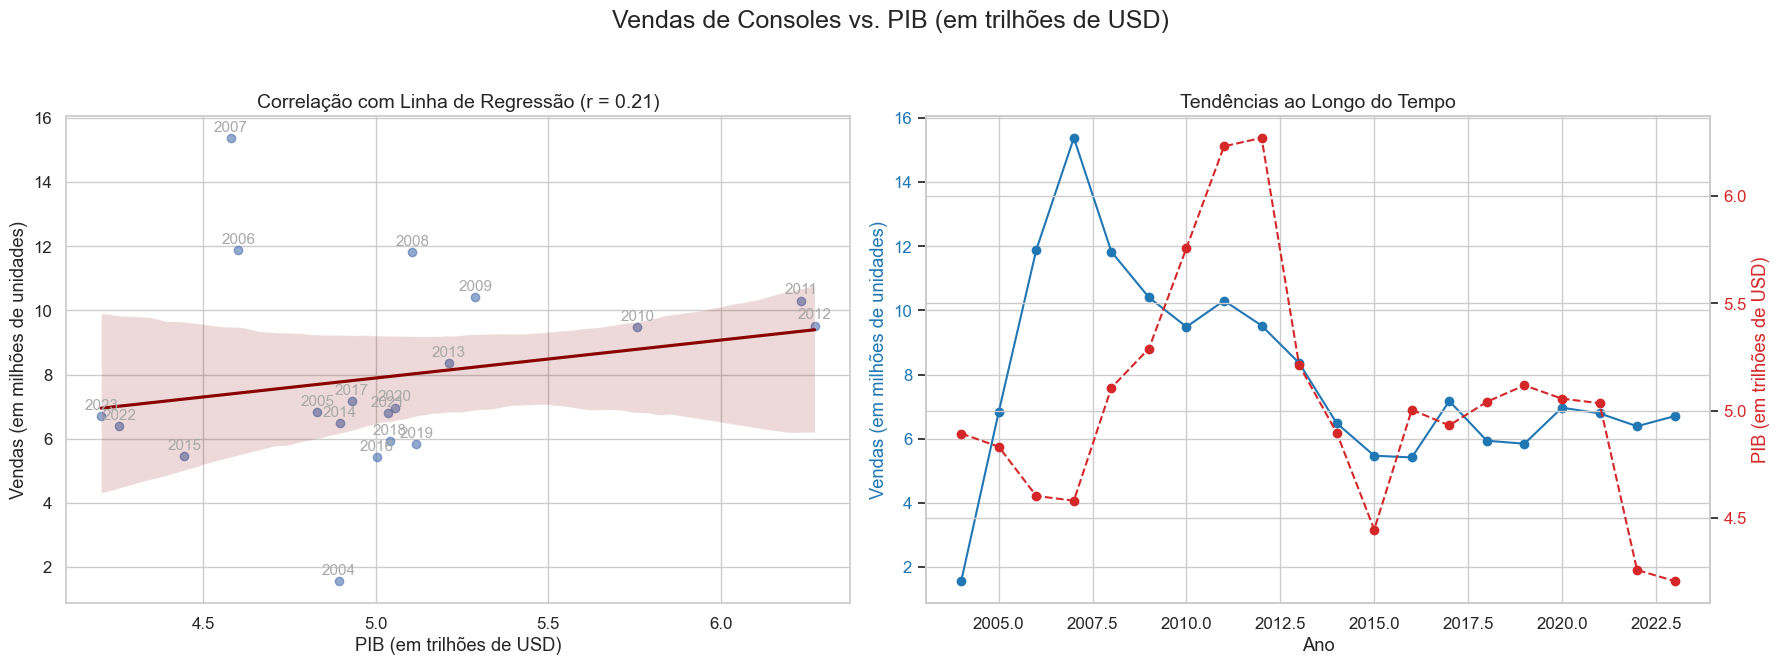

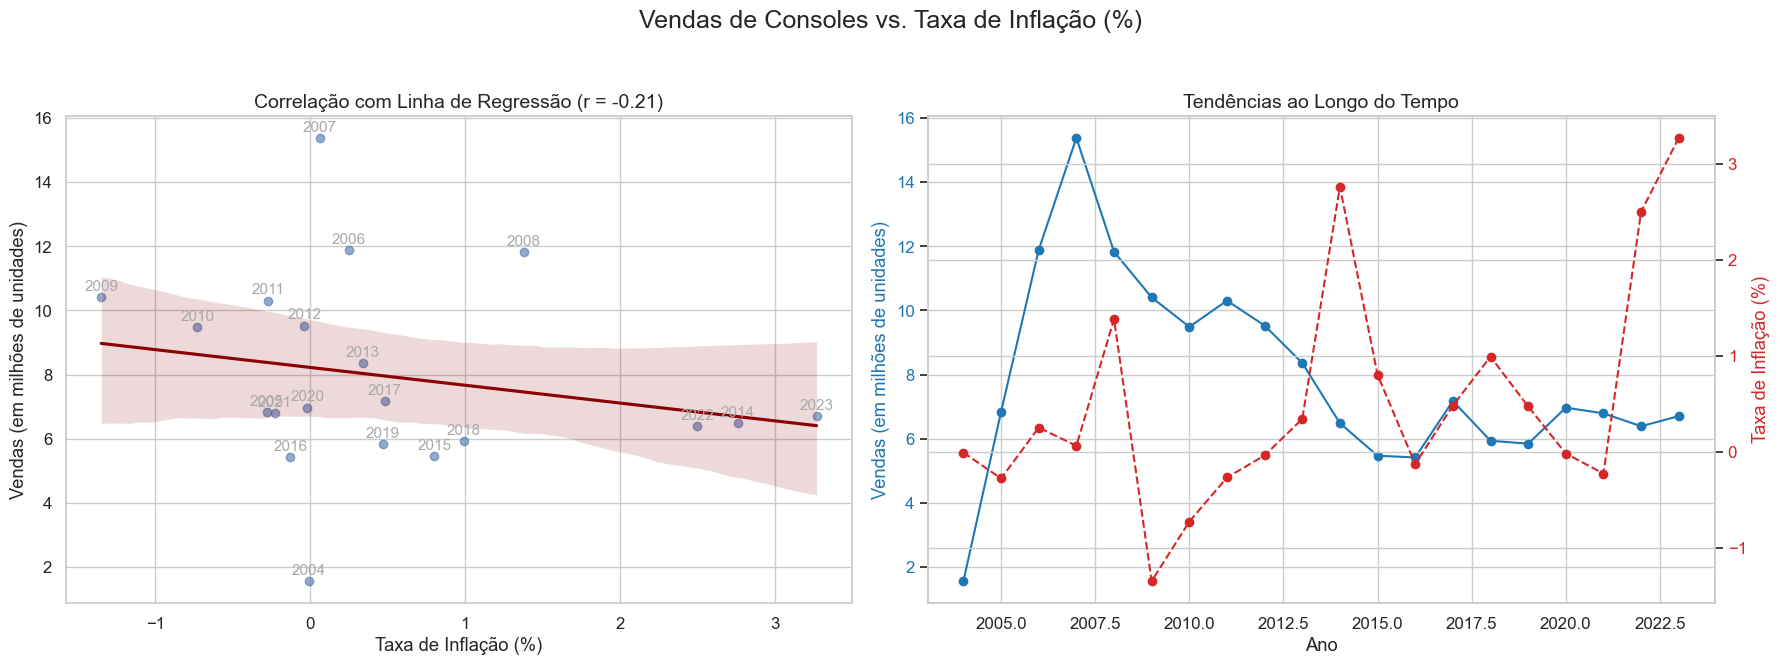

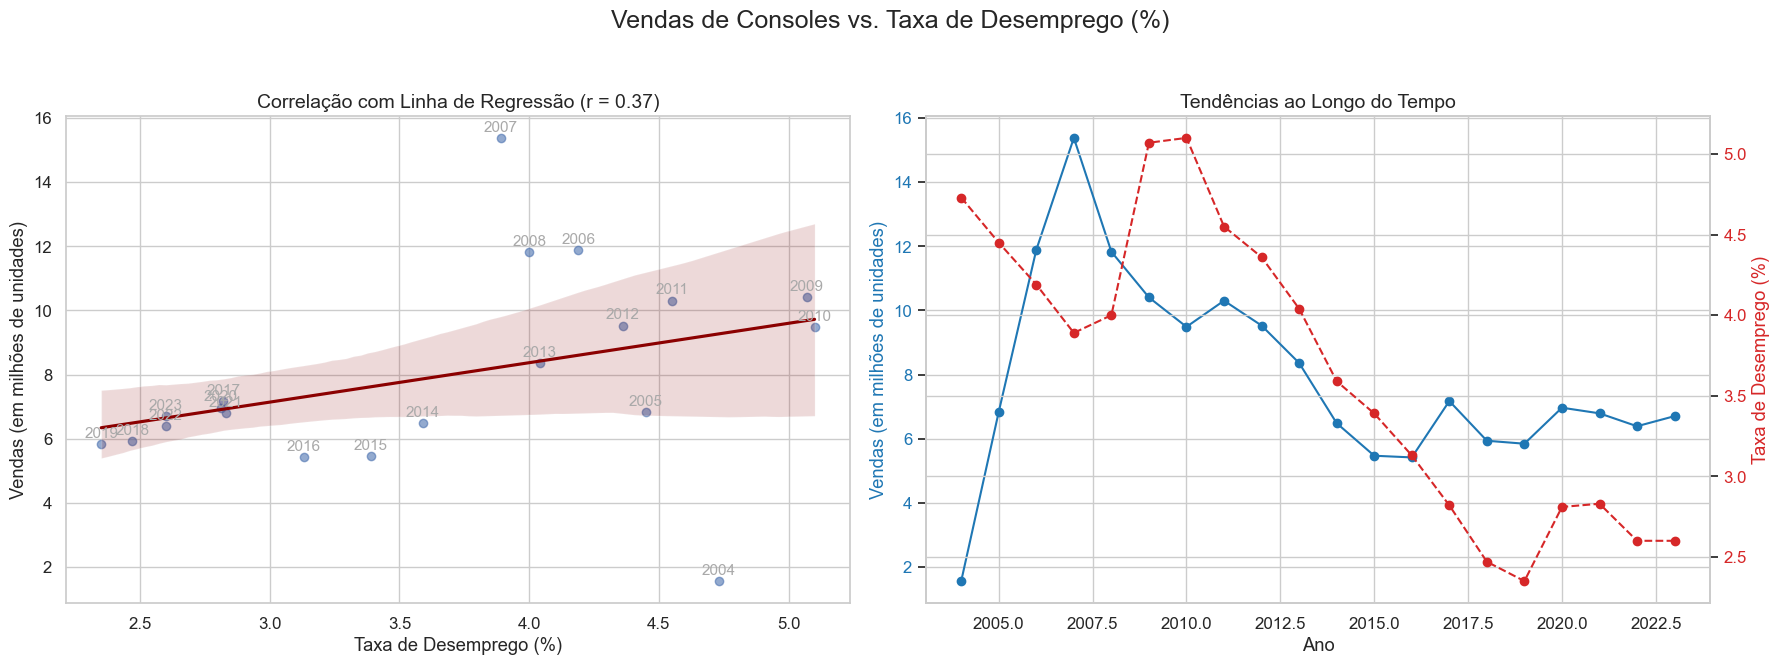

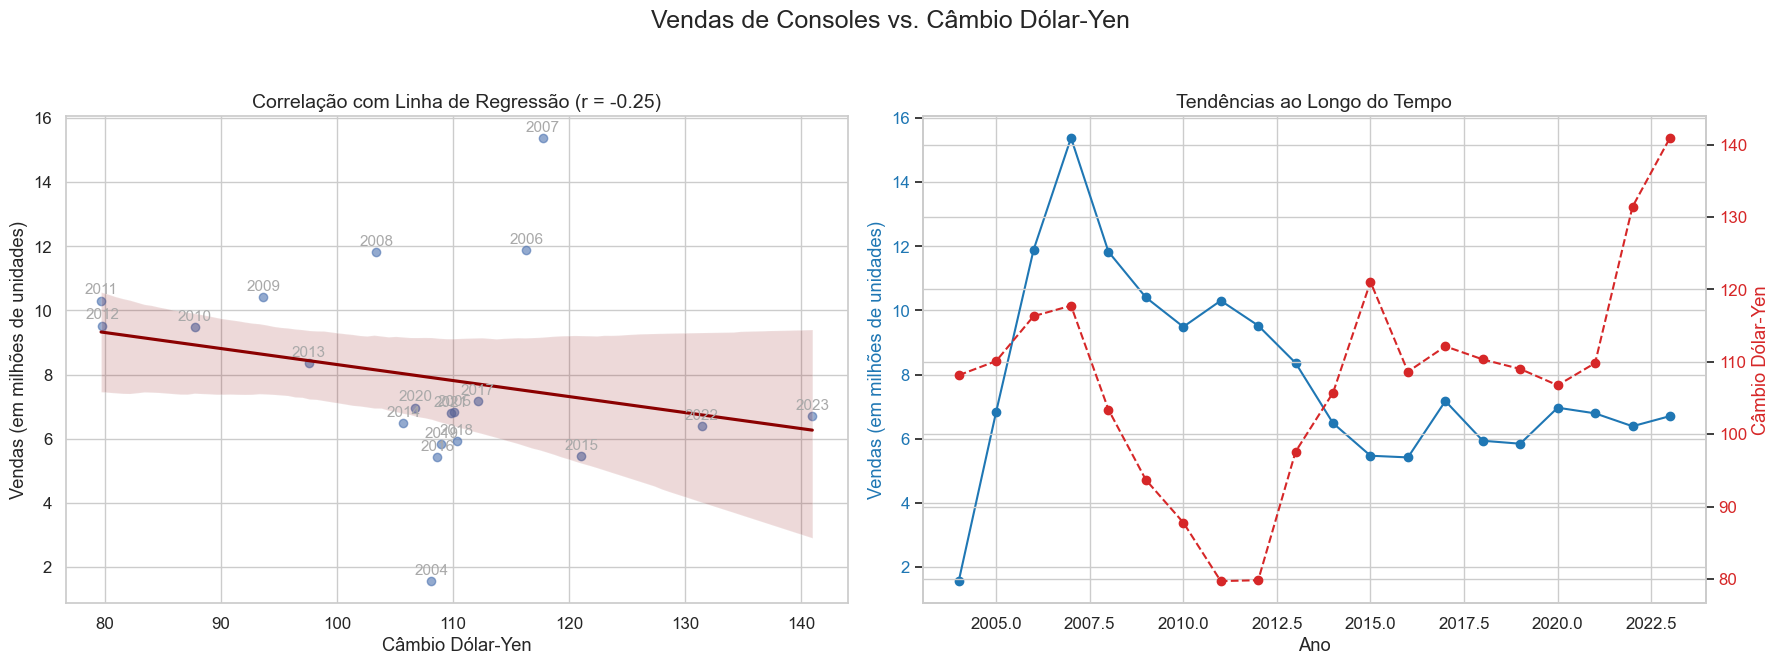

In [81]:
jp_vars = {
    'GDP': 'PIB (em trilhões de USD)',
    'inflation_rate': 'Taxa de Inflação (%)',
    'unemployment': 'Taxa de Desemprego (%)',
    'Dollar_Yen': 'Câmbio Dólar-Yen'
}

correlations(jp_merged_df, jp_vars)

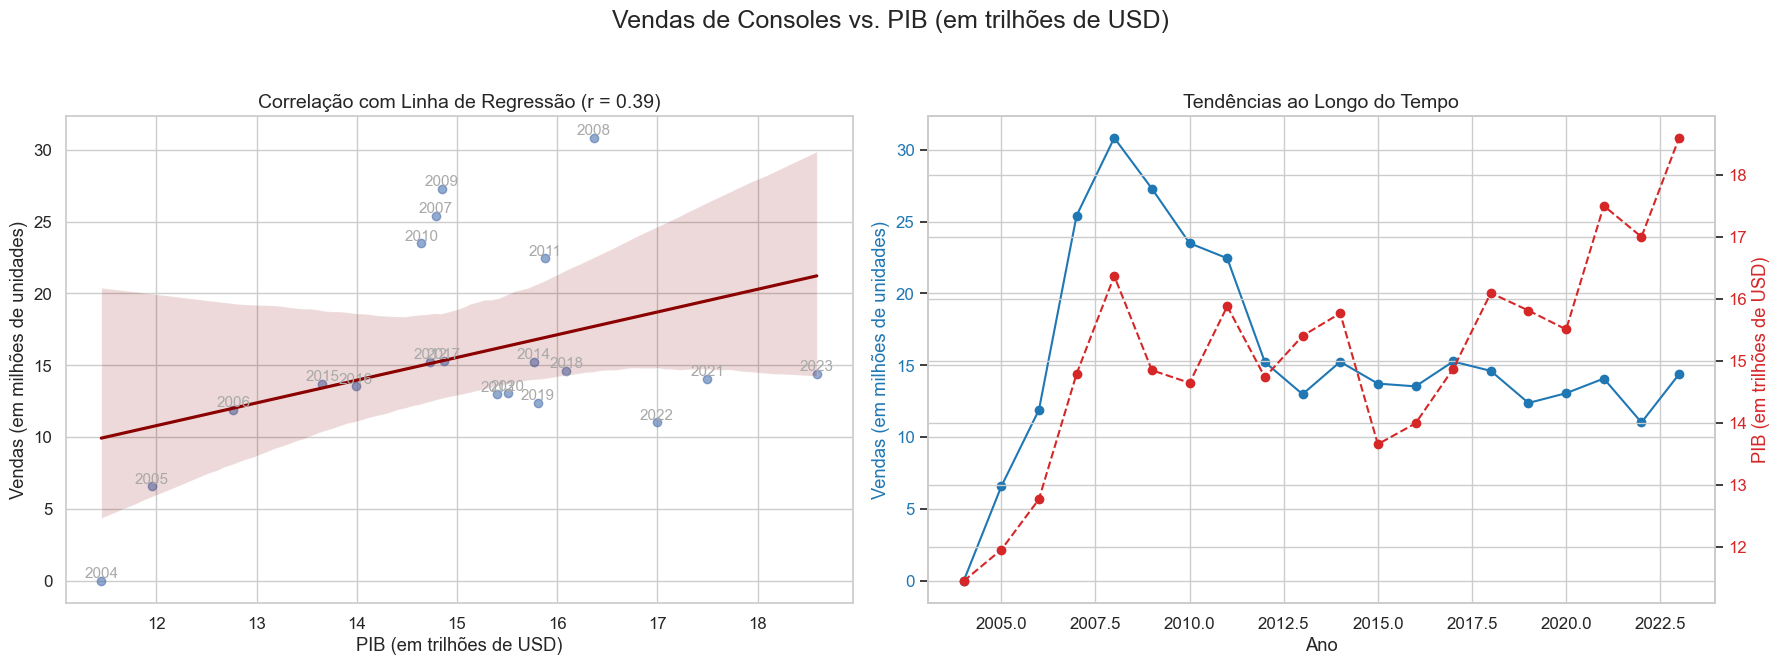

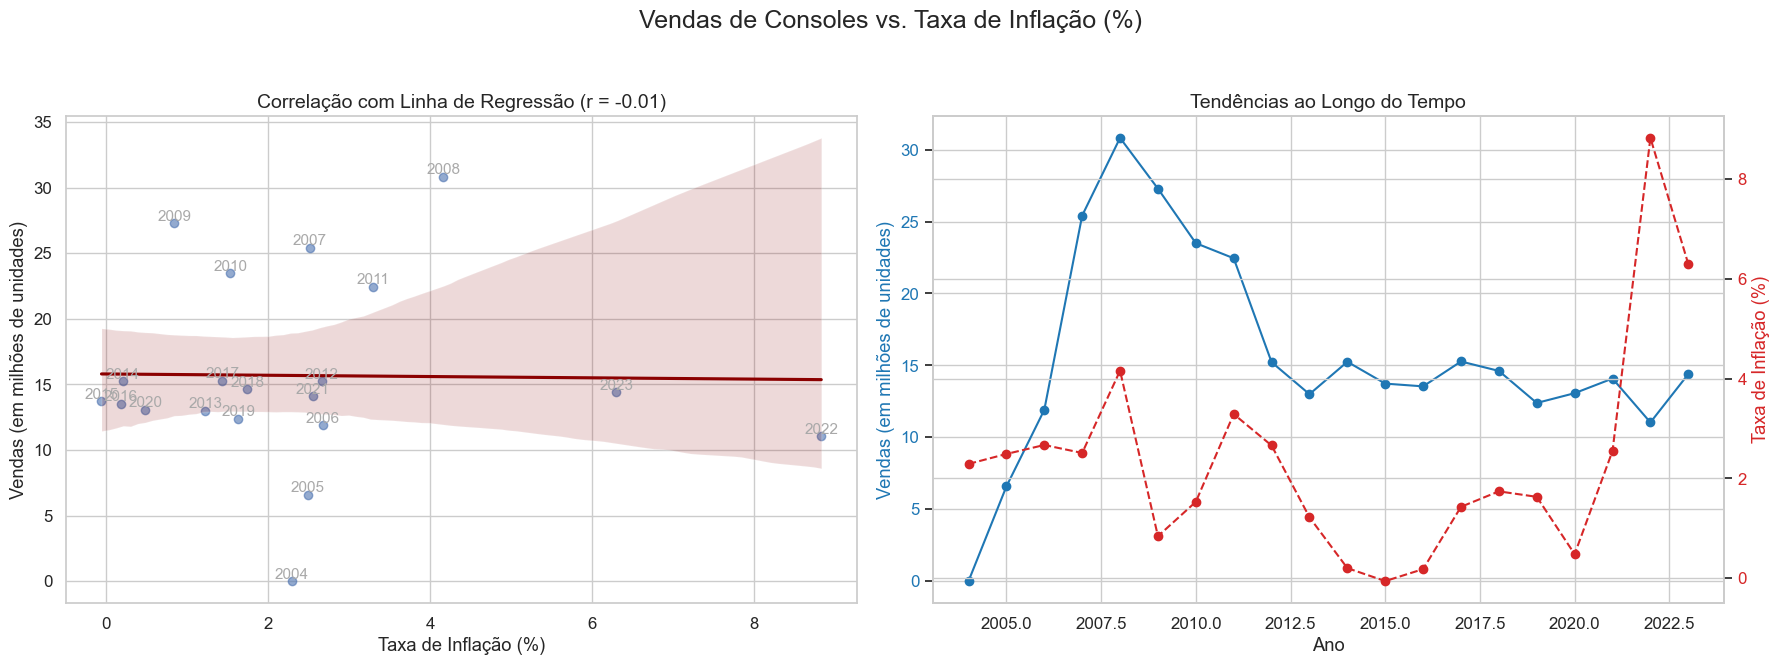

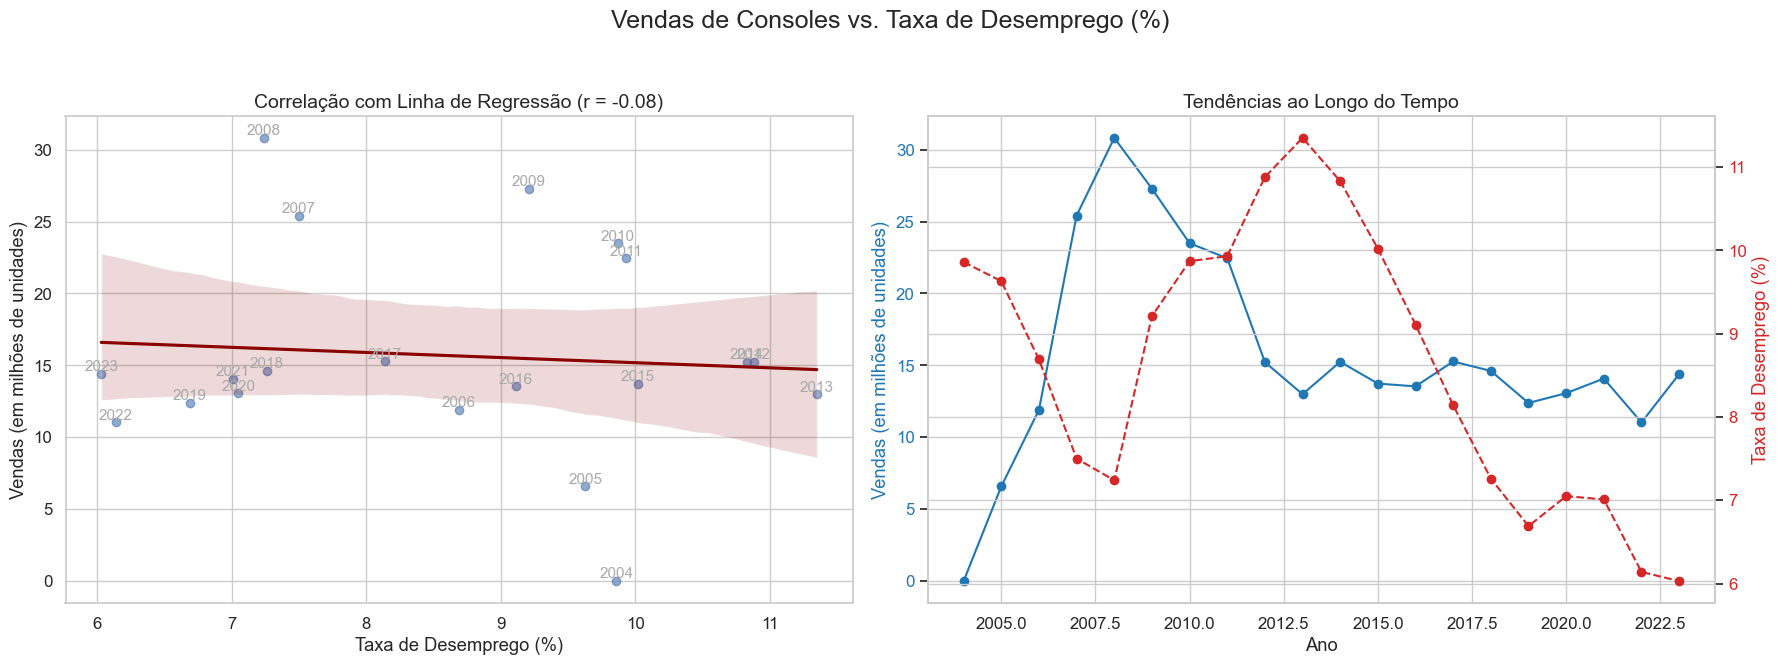

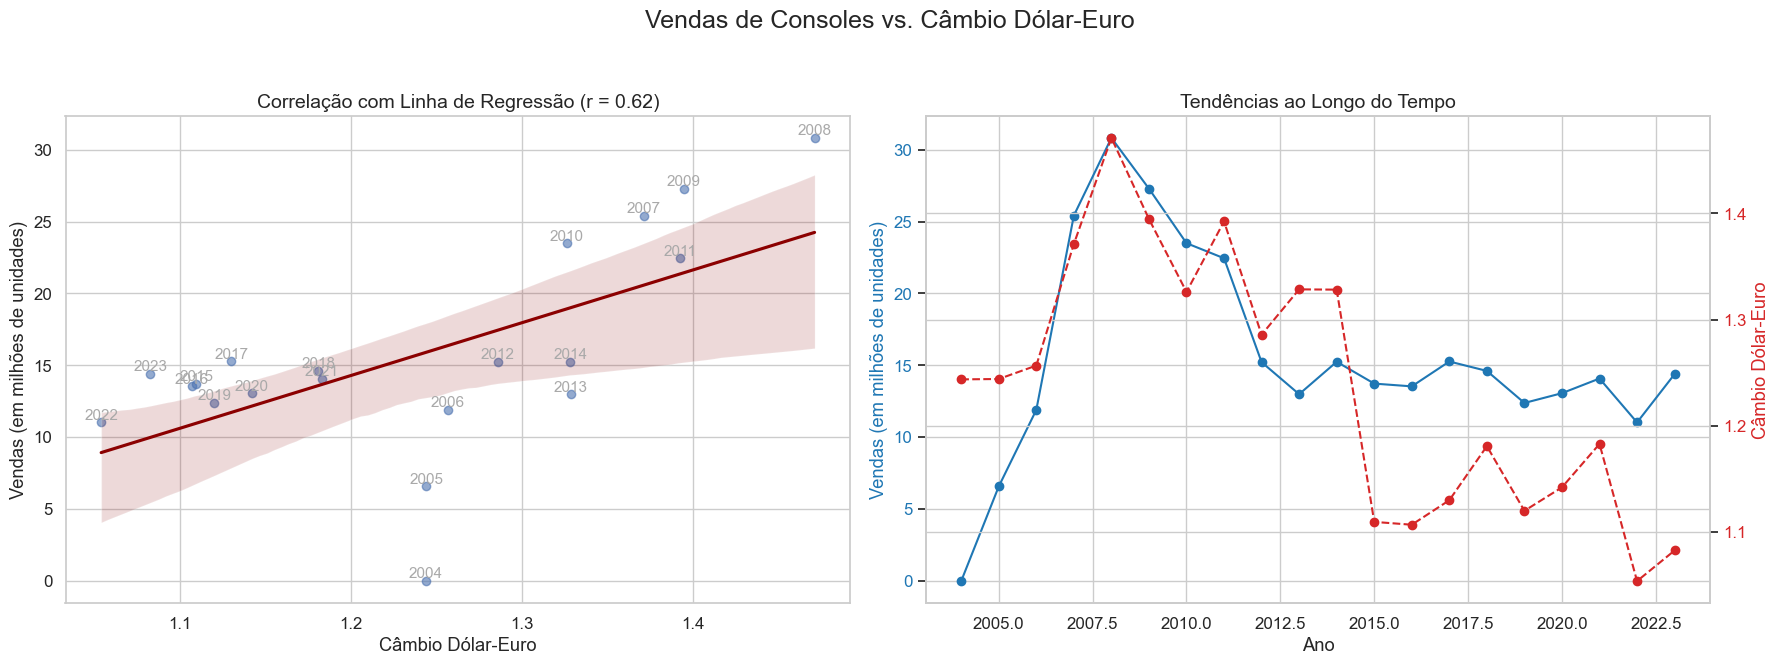

In [82]:
eu_vars = {
    'GDP': 'PIB (em trilhões de USD)',
    'inflation_rate': 'Taxa de Inflação (%)',
    'unemployment': 'Taxa de Desemprego (%)',
    'Dollar_Euro': 'Câmbio Dólar-Euro'
}

correlations(eu_merged_df, eu_vars)

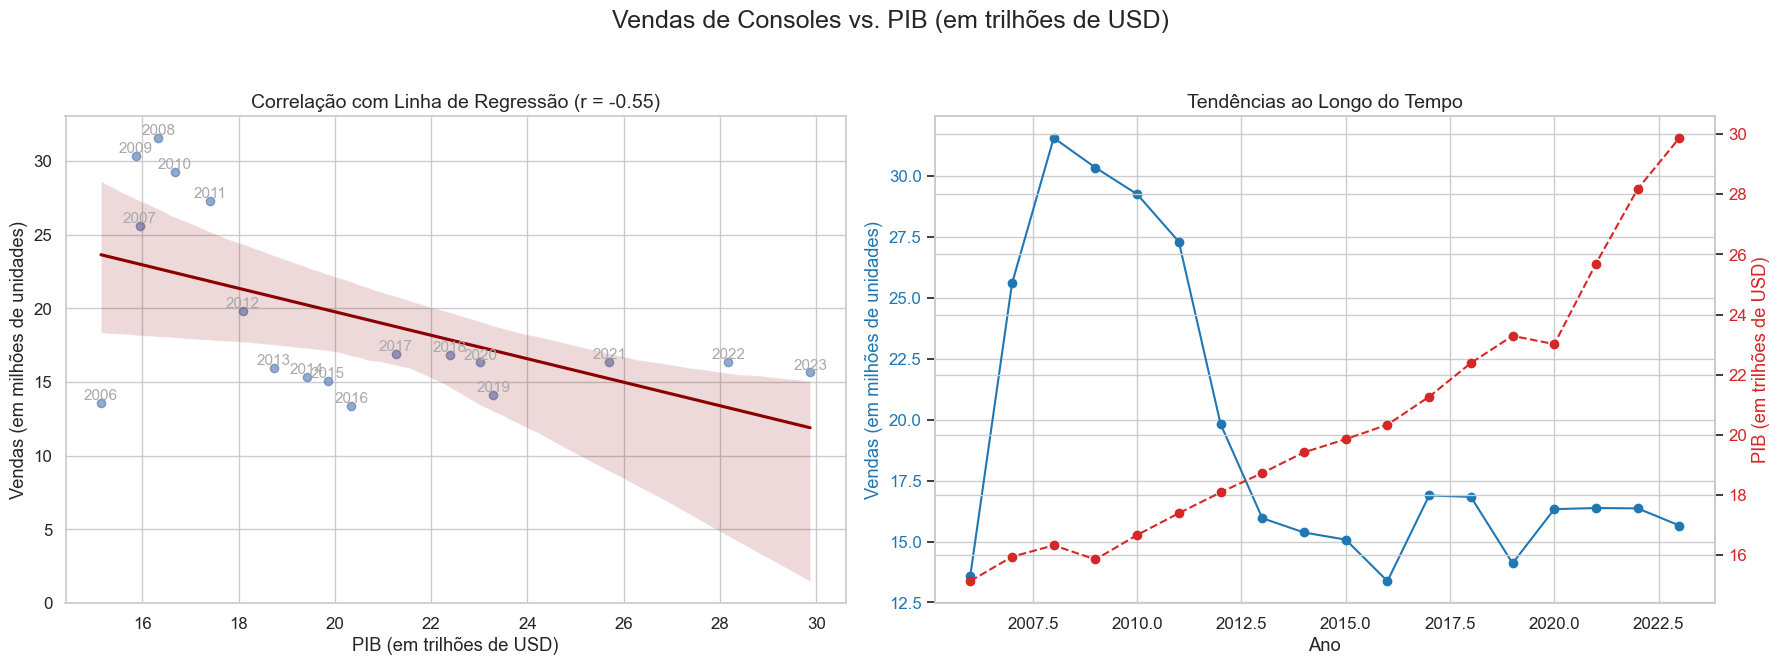

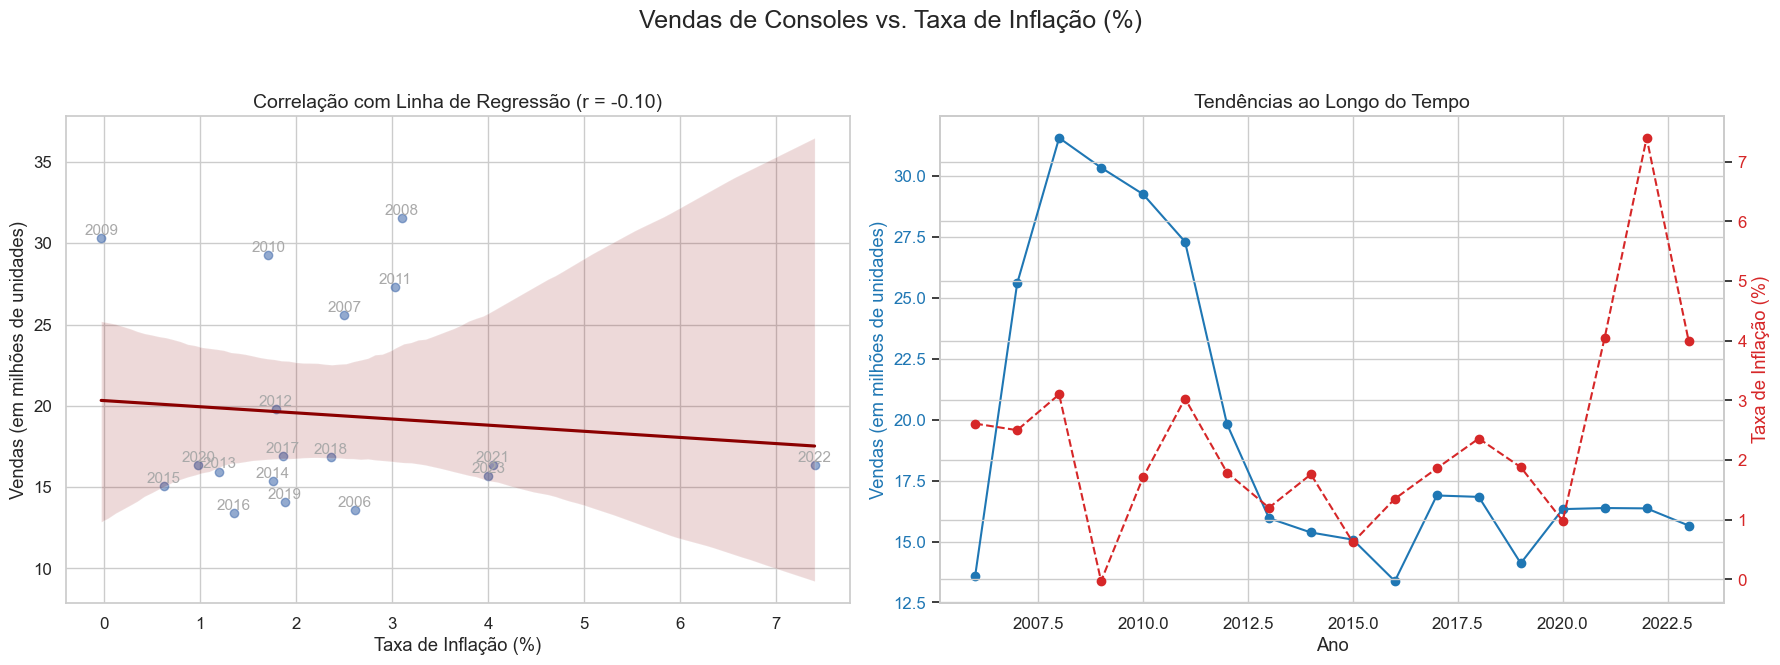

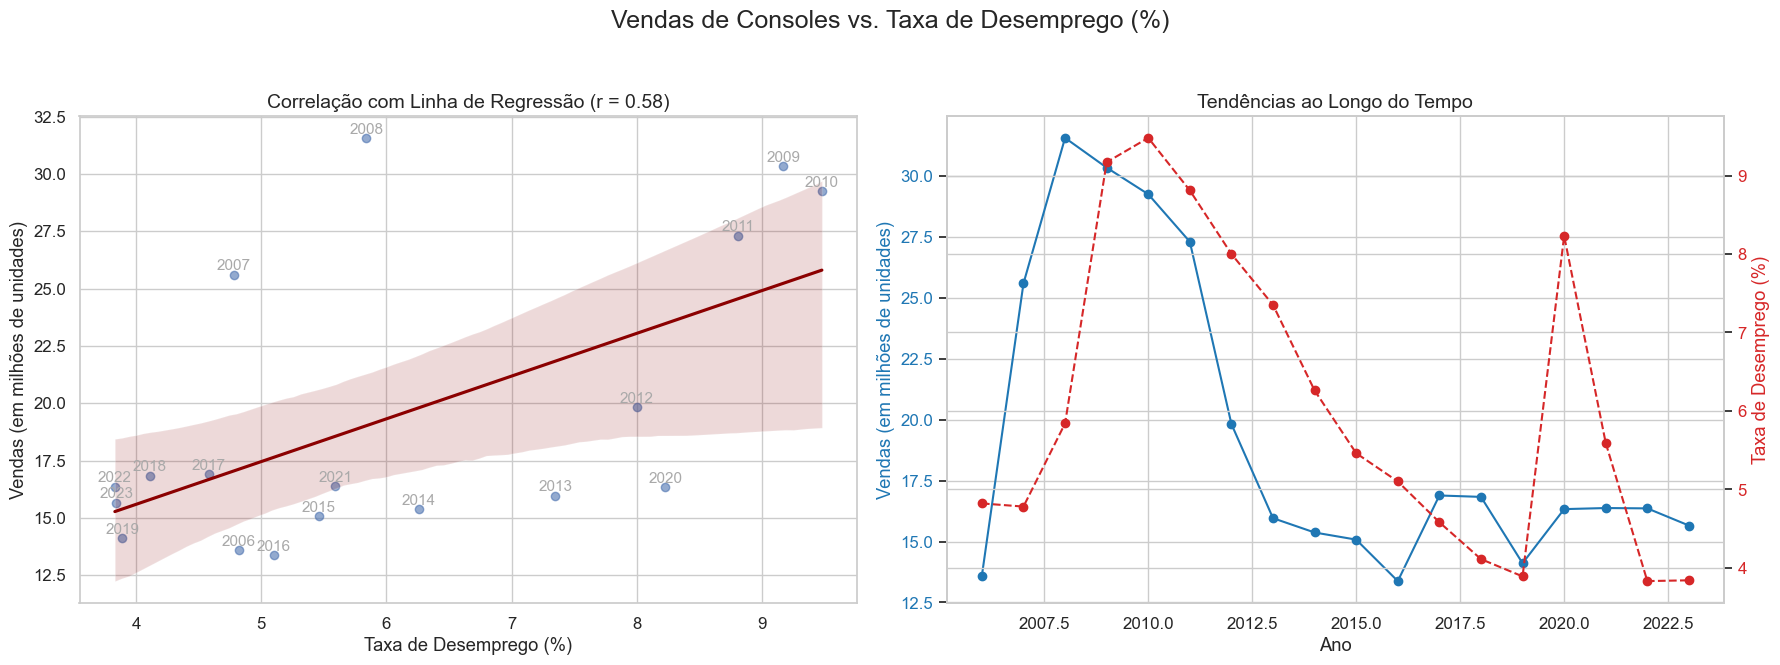

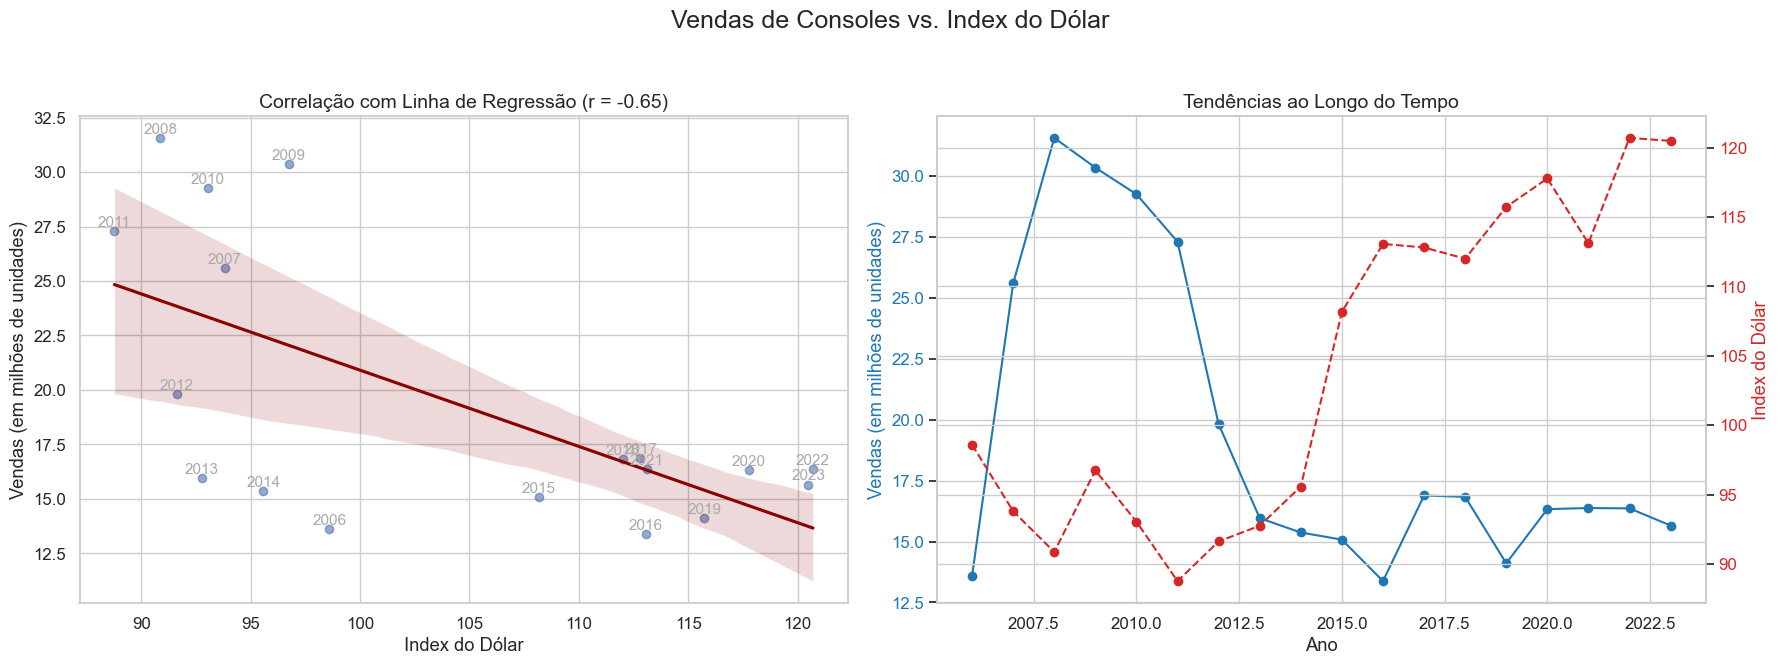

In [83]:
na_vars = {
    'GDP': 'PIB (em trilhões de USD)',
    'inflation_rate': 'Taxa de Inflação (%)',
    'unemployment': 'Taxa de Desemprego (%)',
    'Dollar_Index': 'Index do Dólar'
}

correlations(na_merged_df, na_vars)

In [84]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

def sarimax(concat, region):
    # Bloco 3: Análise de Evento - Pandemia de COVID-19
    # ----------------------------------------------------
    # Objetivo: Modelar o período pré-pandemia (2012-2019) para prever o
    # comportamento das vendas durante a pandemia (2020-2021).

    print("\n--- Iniciando Análise de Evento: Pandemia de COVID-19 ---")

    # 1. Definir períodos e variáveis
    train_2020 = concat.loc['2012-01-01':'2019-12-31']
    test_2020 = concat.loc['2020-01-01':'2021-12-31']

    endog_2020 = train_2020['sales']
    exog_2020_train = train_2020[['GDP', 'unemployment']]
    exog_2020_test = test_2020[['GDP', 'unemployment']]

    # 2. Encontrar os melhores parâmetros SARIMAX
    # CORREÇÃO: Aplicando a mesma lógica de deixar auto_arima encontrar os
    # melhores parâmetros de diferenciação para consistência metodológica.
    auto_model_2020 = pm.auto_arima(endog_2020, exogenous=exog_2020_train,
                                    start_p=1, start_q=1,
                                    test='adf',
                                    max_p=3, max_q=3, m=12,
                                    start_P=0, seasonal=True,
                                    max_d=2, max_D=1, trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)

    print("\nMelhores parâmetros encontrados para o período pré-2020:")
    print(auto_model_2020.summary())

    # 3. Treinar o modelo final e prever
    model_2020 = SARIMAX(endog_2020, exog=exog_2020_train, order=auto_model_2020.order, seasonal_order=auto_model_2020.seasonal_order)
    results_2020 = model_2020.fit()
    forecast_2020 = results_2020.get_forecast(steps=len(test_2020), exog=exog_2020_test)
    forecast_mean_2020 = forecast_2020.predicted_mean
    confidence_intervals_2020 = forecast_2020.conf_int()

    # 4. Plotar os resultados
    plt.figure(figsize=(18, 9))
    plt.plot(concat['sales'] / 1e6, label='Vendas Reais (Histórico Completo)', color='gray') # Dividido por 1M para escala
    plt.plot(test_2020['sales'] / 1e6, label='Vendas Reais (Período da Pandemia)', color='darkgreen', lw=2)
    plt.plot(forecast_mean_2020 / 1e6, label='Previsão Contrafactual (Sem Pandemia)', color='red', linestyle='--', lw=2)
    plt.fill_between(confidence_intervals_2020.index,
                    confidence_intervals_2020.iloc[:, 0] / 1e6,
                    confidence_intervals_2020.iloc[:, 1] / 1e6, color='red', alpha=0.1, label='Intervalo de Confiança (95%)')

    plt.title('Análise de Intervenção: Impacto da Pandemia de COVID-19 nas Vendas de Consoles: ' + region, fontsize=18)
    plt.xlabel('Ano')
    plt.ylabel('Vendas Mensais (em milhões de unidades)') # Ajuste no label do eixo Y
    plt.axvspan('2020-03-01', '2021-06-01', color='green', alpha=0.15, label='Período de Lockdowns')
    plt.legend(loc='upper left')
    plt.ylim(bottom=0) # Garante que o eixo Y não mostre valores negativos

    # 5. Calcular e exibir o impacto total estimado
    impact_df_2020 = pd.DataFrame({
        'vendas_reais': test_2020['sales'],
        'vendas_previstas': forecast_mean_2020
    })
    impact_df_2020['diferenca'] = impact_df_2020['vendas_reais'] - impact_df_2020['vendas_previstas']

    vendas_reais_totais_2020 = impact_df_2020['vendas_reais'].sum()
    vendas_previstas_totais_2020 = impact_df_2020['vendas_previstas'].sum()
    impacto_total_2020 = impact_df_2020['diferenca'].sum()

    print("\n--- Quantificação do Impacto da Pandemia (2020-2021) ---")
    print(f"Vendas Reais Totais no período: {vendas_reais_totais_2020:,.0f} unidades.")
    print(f"Vendas Previstas (Contrafactual) no período: {vendas_previstas_totais_2020:,.0f} unidades.")
    print(f"Impacto Estimado (Diferença): {impacto_total_2020:,.0f} unidades vendidas a mais do que o esperado.")
    if vendas_previstas_totais_2020 > 0:
        print(f"Isso representa um aumento de {(impacto_total_2020 / vendas_previstas_totais_2020) * 100:.2f}% em relação ao previsto.")

    plt.show()



In [85]:
jp_sales_df['date'] = pd.to_datetime(jp_sales_df['week'])
jp_sales_df = jp_sales_df.set_index('date')
jp_month_sales = jp_sales_df['sales'].resample('ME').sum()

jp_unemployment_df['date'] = pd.to_datetime(jp_unemployment_df['year'].astype(str) + '-12-31')
jp_unemployment_df = jp_unemployment_df.set_index('date')
jp_month_unemployment = jp_unemployment_df['unemployment'].resample('ME').ffill()

jp_gdp_df['date'] = pd.to_datetime(jp_gdp_df['year'].astype(str) + '-12-31')
jp_gdp_df = jp_gdp_df.set_index('date')
jp_month_gdp = jp_gdp_df['GDP'].resample('ME').ffill()

jp_concat = pd.concat([jp_month_sales, jp_month_gdp, jp_month_unemployment], axis=1).dropna()
jp_concat

,sales,GDP,unemployment
date,,,
2004-11-30,0.0,4.519562,5.25
2004-12-31,1557436.0,4.893116,4.73
2005-01-31,832932.0,4.893116,4.73
2005-02-28,300419.0,4.893116,4.73
2005-03-31,327284.0,4.893116,4.73
...,...,...,...
2023-08-31,529875.0,4.256411,2.60
2023-09-30,620771.0,4.256411,2.60
2023-10-31,363115.0,4.256411,2.60



--- Iniciando Análise de Evento: Pandemia de COVID-19 ---
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=2689.384, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2725.797, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2689.566, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2688.259, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2848.037, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2715.396, Time=0.02 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=2686.501, Time=0.12 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=2698.942, Time=0.05 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=2683.999, Time=0.15 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=2683.044, Time=0.08 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=2689.932, Time=0.07 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=2683.789, Time=0.13 sec
 ARIMA(0,0,2)(0,0,2)[12] interce

C:\Users\jpsmo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


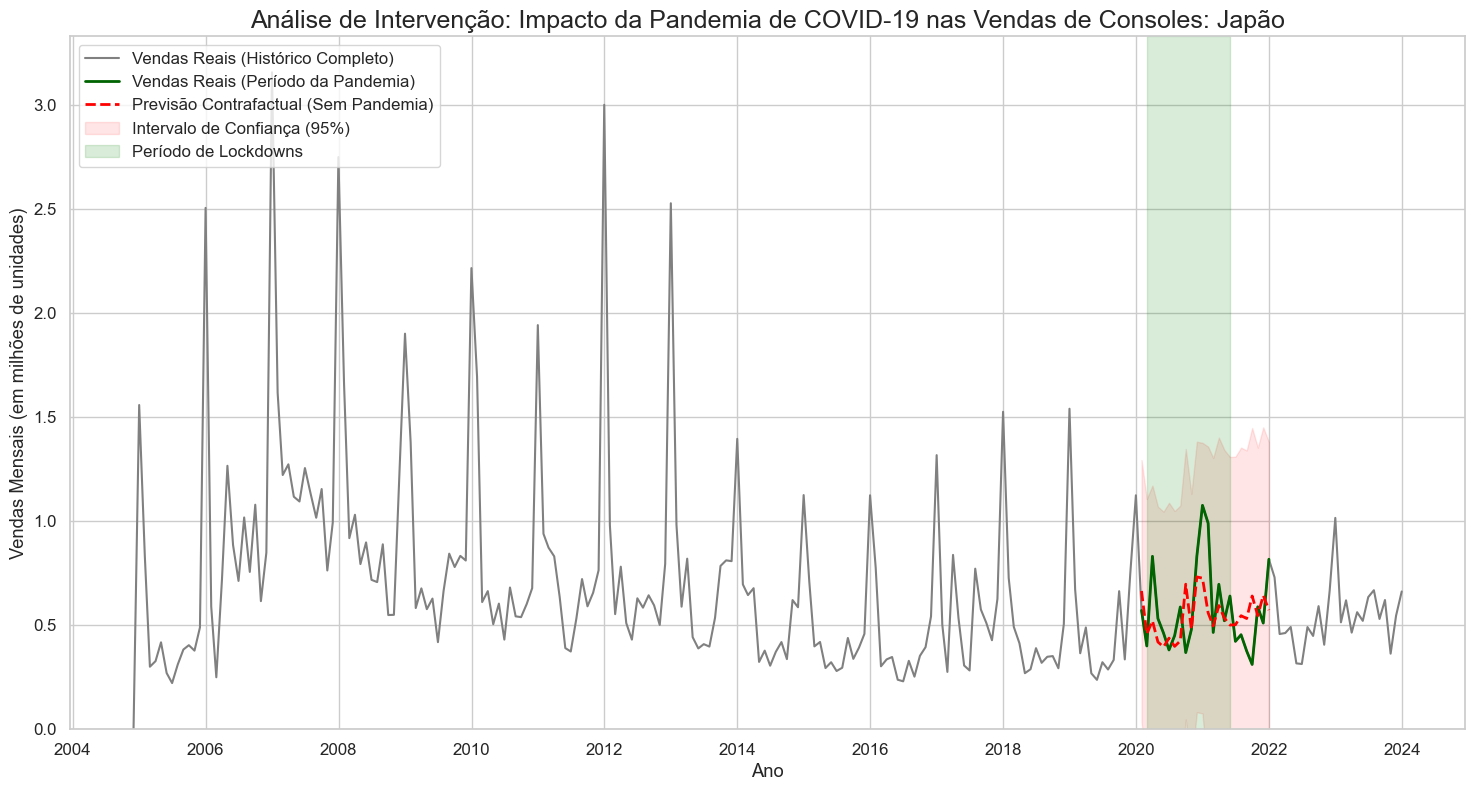

In [86]:
sarimax(jp_concat, "Japão")

In [87]:
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 6)

eu_sales_df['date'] = pd.to_datetime(eu_sales_df['week'])
eu_sales_df = eu_sales_df.set_index('date')
eu_month_sales = eu_sales_df['sales'].resample('ME').sum()

eu_unemployment_df['date'] = pd.to_datetime(eu_unemployment_df['year'].astype(str) + '-12-31')
eu_unemployment_df = eu_unemployment_df.set_index('date')
eu_month_unemployment = eu_unemployment_df['unemployment'].resample('ME').ffill()

eu_gdp_df['date'] = pd.to_datetime(eu_gdp_df['year'].astype(str) + '-12-31')
eu_gdp_df = eu_gdp_df.set_index('date')
eu_month_gdp = eu_gdp_df['GDP'].resample('ME').ffill()

eu_concat = pd.concat([eu_month_sales, eu_month_gdp, eu_month_unemployment], axis=1).dropna()
eu_concat

,sales,GDP,unemployment
date,,,
2004-11-30,0.0,9.956957,9.70
2004-12-31,0.0,11.449209,9.86
2005-01-31,0.0,11.449209,9.86
2005-02-28,0.0,11.449209,9.86
2005-03-31,486579.0,11.449209,9.86
...,...,...,...
2023-08-31,991277.0,16.995332,6.14
2023-09-30,1003255.0,16.995332,6.14
2023-10-31,1013301.0,16.995332,6.14



--- Iniciando Análise de Evento: Pandemia de COVID-19 ---
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=2830.821, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2890.055, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2829.144, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2829.665, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2996.024, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2875.641, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2830.537, Time=0.20 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2822.316, Time=0.11 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2832.009, Time=0.03 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=2822.013, Time=0.17 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=2823.444, Time=0.09 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   

C:\Users\jpsmo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'



--- Quantificação do Impacto da Pandemia (2020-2021) ---
Vendas Reais Totais no período: 27,149,021 unidades.
Vendas Previstas (Contrafactual) no período: 25,721,861 unidades.
Impacto Estimado (Diferença): 1,427,160 unidades vendidas a mais do que o esperado.
Isso representa um aumento de 5.55% em relação ao previsto.


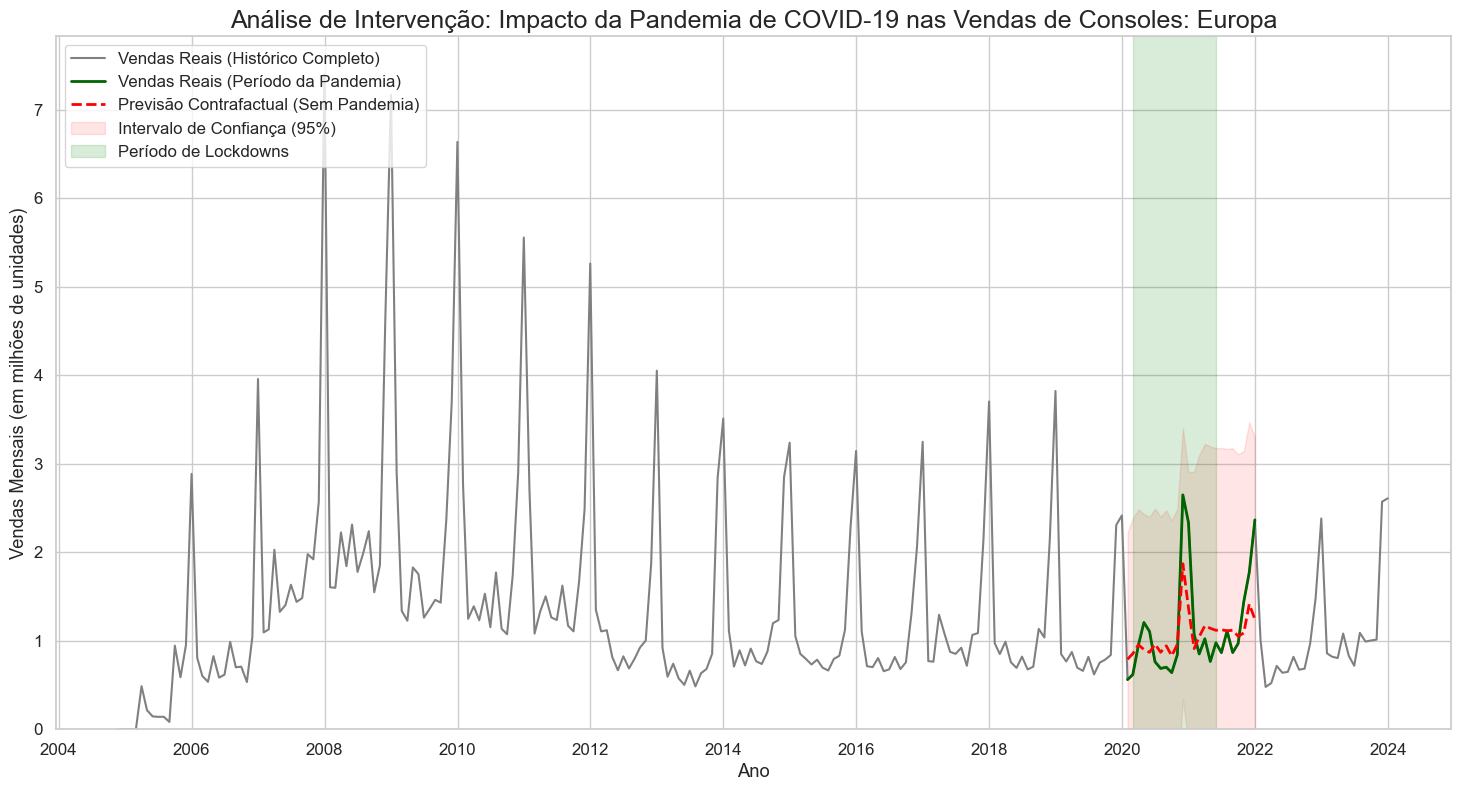

In [88]:
sarimax(eu_concat, "Europa")

In [89]:
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 6)

na_sales_df['date'] = pd.to_datetime(na_sales_df['week'])
na_sales_df = na_sales_df.set_index('date')
na_month_sales = na_sales_df['sales'].resample('ME').sum()

na_unemployment_df['date'] = pd.to_datetime(na_unemployment_df['year'].astype(str) + '-12-31')
na_unemployment_df = na_unemployment_df.set_index('date')
na_month_unemployment = na_unemployment_df['unemployment'].resample('ME').ffill()

na_gdp_df['date'] = pd.to_datetime(na_gdp_df['year'].astype(str) + '-12-31')
na_gdp_df = na_gdp_df.set_index('date')
na_month_gdp = na_gdp_df['GDP'].resample('ME').ffill()

na_concat = pd.concat([na_month_sales, na_month_gdp, na_month_unemployment], axis=1).dropna()
na_concat

,sales,GDP,unemployment
date,,,
2004-11-30,486391.0,12.356177,6.15
2004-12-31,745240.0,13.248371,5.70
2005-01-31,212977.0,13.248371,5.70
2005-02-28,129478.0,13.248371,5.70
2005-03-31,530541.0,13.248371,5.70
...,...,...,...
2023-08-31,777278.0,28.176204,3.83
2023-09-30,1026216.0,28.176204,3.83
2023-10-31,742042.0,28.176204,3.83



--- Iniciando Análise de Evento: Pandemia de COVID-19 ---
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=2907.985, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2970.943, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2905.152, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2905.813, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3041.925, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2955.117, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2907.005, Time=0.13 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2901.267, Time=0.22 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2913.954, Time=0.04 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=2899.831, Time=0.16 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=2902.684, Time=0.09 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   

C:\Users\jpsmo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jpsmo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



--- Quantificação do Impacto da Pandemia (2020-2021) ---
Vendas Reais Totais no período: 32,707,945 unidades.
Vendas Previstas (Contrafactual) no período: 33,708,544 unidades.
Impacto Estimado (Diferença): -1,000,599 unidades vendidas a mais do que o esperado.
Isso representa um aumento de -2.97% em relação ao previsto.


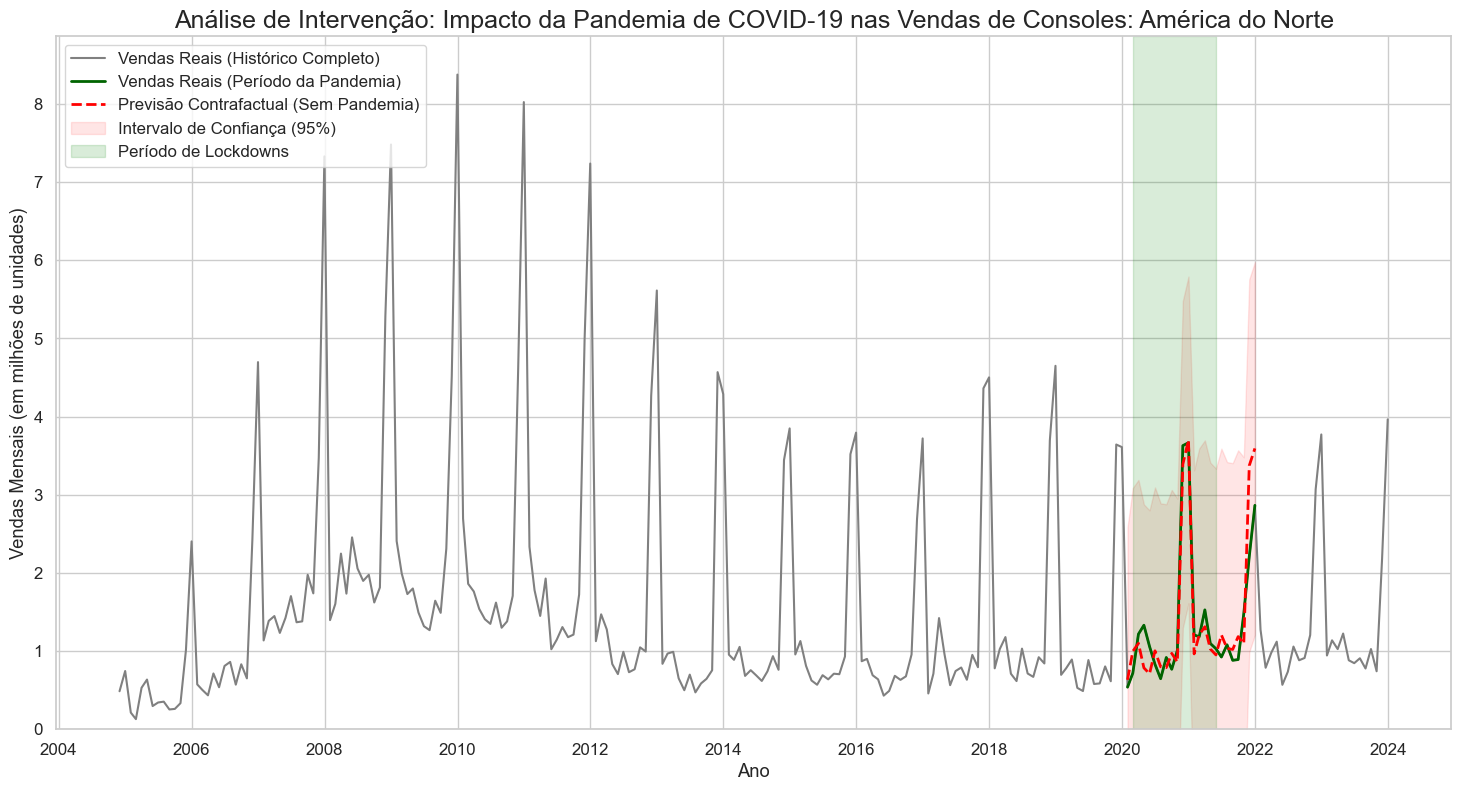

In [90]:
sarimax(na_concat, "América do Norte")

In [91]:
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 6)

global_sales_df['date'] = pd.to_datetime(global_sales_df['week'])
global_sales_df = global_sales_df.set_index('date')
global_month_sales = global_sales_df['sales'].resample('ME').sum()

global_unemployment_df['date'] = pd.to_datetime(global_unemployment_df['year'].astype(str) + '-12-31')
global_unemployment_df = global_unemployment_df.set_index('date')
global_month_unemployment = global_unemployment_df['unemployment'].resample('ME').ffill()

global_gdp_df['date'] = pd.to_datetime(global_gdp_df['year'].astype(str) + '-12-31')
global_gdp_df = global_gdp_df.set_index('date')
global_month_gdp = global_gdp_df['GDP'].resample('ME').ffill()

global_concat = pd.concat([global_month_sales, global_month_gdp, global_month_unemployment], axis=1).dropna()
global_concat

,sales,GDP,unemployment
date,,,
2004-11-30,546507.0,39.181756,6.50
2004-12-31,2394784.0,44.151099,6.34
2005-01-31,1072231.0,44.151099,6.34
2005-02-28,476671.0,44.151099,6.34
2005-03-31,1453760.0,44.151099,6.34
...,...,...,...
2023-08-31,2842481.0,100.000000,5.26
2023-09-30,3407032.0,100.000000,5.26
2023-10-31,2561741.0,100.000000,5.26



--- Iniciando Análise de Evento: Pandemia de COVID-19 ---
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=3068.268, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3130.389, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3066.213, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3066.809, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3226.468, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3114.189, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=3067.482, Time=0.20 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=3059.873, Time=0.22 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=3071.186, Time=0.05 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=3059.260, Time=0.20 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=3061.591, Time=0.08 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   

C:\Users\jpsmo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jpsmo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



--- Quantificação do Impacto da Pandemia (2020-2021) ---
Vendas Reais Totais no período: 94,961,670 unidades.
Vendas Previstas (Contrafactual) no período: 87,267,290 unidades.
Impacto Estimado (Diferença): 7,694,380 unidades vendidas a mais do que o esperado.
Isso representa um aumento de 8.82% em relação ao previsto.


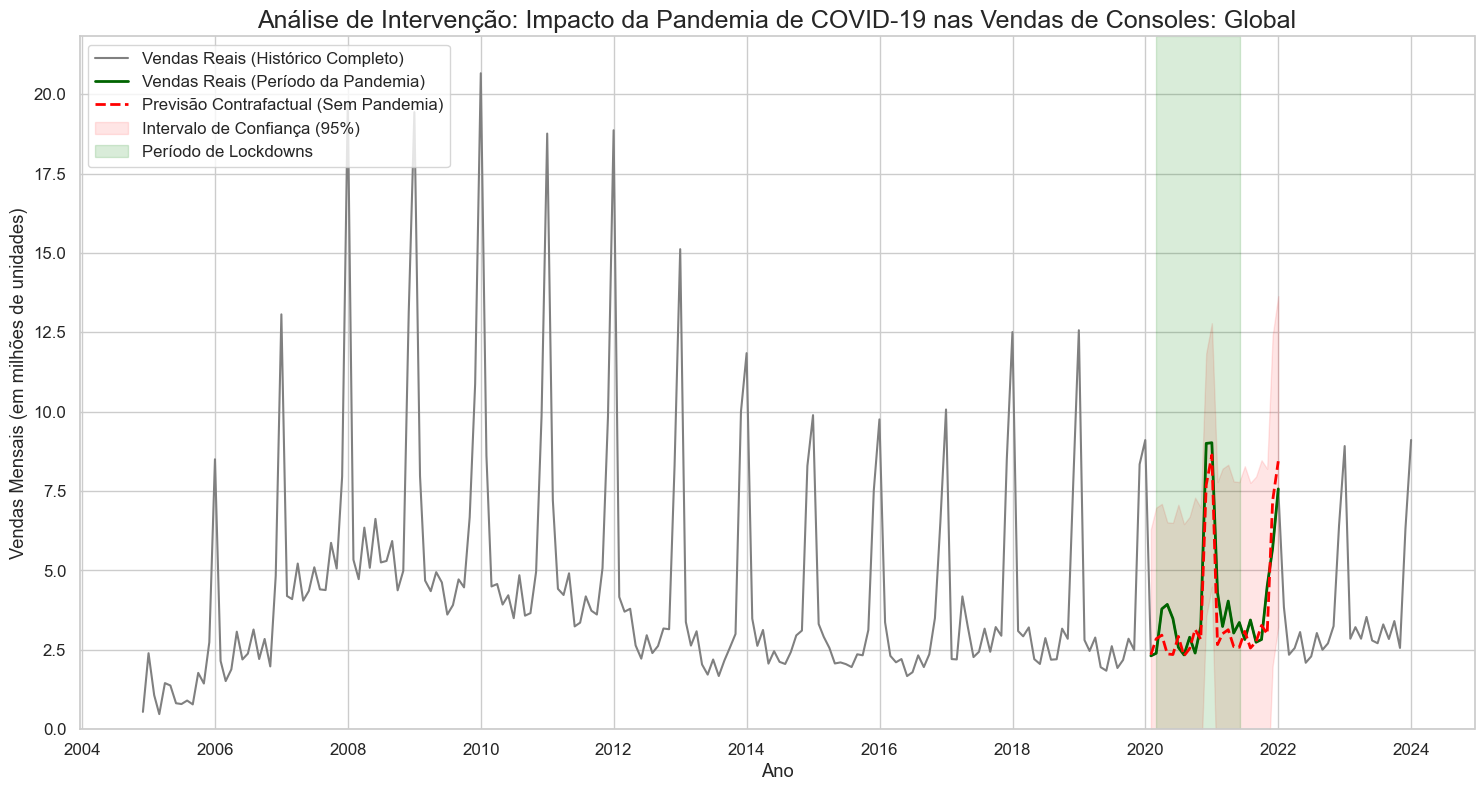

In [92]:
sarimax(global_concat, "Global")

(To-Do)
Análise de Séries Temporais (Modelos VAR/VECM):

Objetivo: Ir além da simples correlação e analisar as relações dinâmicas e de causalidade ao longo do tempo. Um modelo de Vetor Autorregressivo (VAR) pode examinar como um "choque" em uma variável (por exemplo, um aumento súbito no desemprego) afeta as outras variáveis (vendas) nos períodos seguintes.

Perguntas a responder: O desemprego causa um aumento nas vendas de consoles, ou ambos são impulsionados por um terceiro fator não observado? Quanto tempo leva para um aumento no desemprego se traduzir em um aumento nas vendas?